# Predicting heart disease using ML
This notebook provided by me <a href='https://github.com/withayoob'>withayoob</a> <br>
Where i've try to use machine learning algortihms using a looot of Python Librairies to get or to solve a machine learning problem that can be capable of predicting *if* a person has or has not heart disease based on their medical attributes.

###### In order to achieve that here's our walk through Map:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### Problem definition:
Our role here is to build a machine learning model, where it can predict for a clinical if their patients have heart disease or not !!?

### Data:
So in case you want to practice or getting your hand dirty, you can to get this dataset from 2 places the First it's uci & the 2nd is kaggle:
* UC Irvine by clicking **<a href='https://archive-beta.ics.uci.edu/ml/datasets/heart+disease'> Here</a>**
* Kaggle by Clicking **<a href='https://www.kaggle.com/c/heart-disease-uci/data'> Here</a>**

### Evalaution:
> So we have to choose a goal & our goal is: get **95%** in the accuracy test

### Features:
Let's discover our Data features:
1. `Age`: age in years
2. `Sex`: sex, where 1 = male & 0 = female
3. `Cp`: chest pain type, where **0**: typical angina - **1**: atypical angina - **2**: non-anginal pain - **3**: asymptomatic
>So in our case we don't have any relation with medical domain that's why, we have to make some little search on google to discover the difference between all of *chest pain type* <br>
    **typical angina**:  the discomfort that is noted when the heart does not get enough blood or oxygen <br>
    **atypical angina**: When one experiences chest pain that doesn't meet the criteria for angina <br>
    **non-anginal pain**: chest pain that resembles heart pain (also called angina) in patients who do not have heart disease <br>
    **asymptomatic**: Silent Heart Attacks <br>
4. `Trestbps`: displays the resting blood pressure value of an individual in mmHg, more than 130-140 you have to be attention something wrong.
5. `chol`: displays the serum cholesterol in mg/dl, pay attetion if it's more than 200
6. `fbs`: compares the fasting blood sugar value of an individual with 120mg/dl.
    [*If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)*]
7. `restecg`: displays resting electrocardiographic results: 
    **0** = normal - 
    **1** = having ST-T wave abnormality - 
    **2** = left ventricular hyperthrophy
8. `thalach`: displays the max heart rate achieved by an individual.
9. `exang`: Exercise induced angina : **1** = yes - **0** = no
10. `oldpeak`: ST depression induced by exercise relative to rest
11. `slope`:  the slope of the peak exercise ST segment : <br>
    **0**: upsloping (uncommon)<br>
    **1**: flat (typical healthy heart)<br>
    **2**: downsloping (unhealthy heart)
12. `ca`: number of major vessels (0-3) colored by flourosopy
13. `thal`: displays the thalassemia *an inherited blood disorder that causes your body to have less hemoglobin than normal* :<br>
    **3** = normal<br>
    **6** = fixed defect<br>
    **7** = reversible defect<br>
14. `target`: have disease or not (1=yes, 0=no)

> Yes! i know there's a lot of information to know but it's okeey, Now take a deep breath and let's start our work

# Exploratory Data Analysis (aka. EDA)

the goal behind EDA, knowing wgich type of data we have and getting in touch with data geeting familair weth it, knowing if we have some outliers if yes we have to get them off our dataset, if having missing data we have to get it too off.

In this step i highly recommend  to use and have a look in the Exploratory Data Analysis for Feature Selection in Machine
Learning by Google to get more idea about how we can have a good EDA from **<a href="https://services.google.com/fh/files/misc/exploratory_data_analysis_for_feature_selection_in_machine_learning.pdf" >Here</a>**

In [1]:
#importing Pandas, numpy, seaborn & matplotlib: we'll use them to manipulating, annalysing our dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we use this line if we want our plot to appear inside the notebook
%matplotlib inline

In [2]:
#importing our loading the dataset
dataset = pd.read_csv("HeartDisease.csv")
dataset.shape

(303, 14)

By running the `dataset.shape`, we can see that our Dataset has 303 variables with 14 Features
But being honest 303 variable isn't a big thing and maybe in future we need more than that to be sure that our model work perfectly.

In [3]:
dataset.head()
#.head() showing just the First 5 lines

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.tail()
#.tail() showing just the Last 5 lines

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#
dataset["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

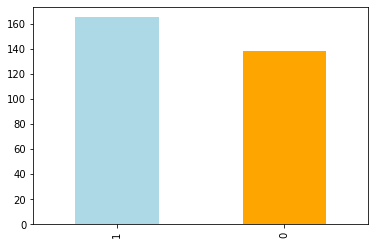

In [6]:
dataset["target"].value_counts().plot(kind = "bar", color = ["lightblue", "orange"]);

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#calculate missing value if we have some.
dataset.isna().sum() # owh thank god we don't have some missing value to work on it maybe later

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#computes a summary of statistics pertaining to the DataFrame columns
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#by using crosstab to make a comparison between having heart disease or not with sex
pd.crosstab(dataset["target"], dataset["sex"])

sex,0,1
target,,
0,24,114
1,72,93


Soo, according to the crosstab we can see that 72/96 of females have heart disease but in case of males we have 93/207, and what we can conclude that the females can have heart disease more than males from this comparaison we can say that if the sample is female maybe she has heart disease with chance of 70%

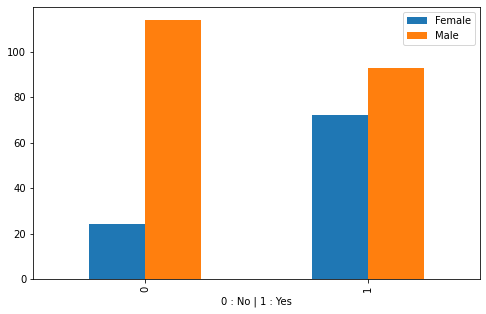

In [11]:
pd.crosstab(dataset["target"], dataset["sex"]).plot(kind = "bar", figsize = (8, 5))
plt.legend(["Female", "Male"])
plt.xlabel("0 : No | 1 : Yes")
plt.show()

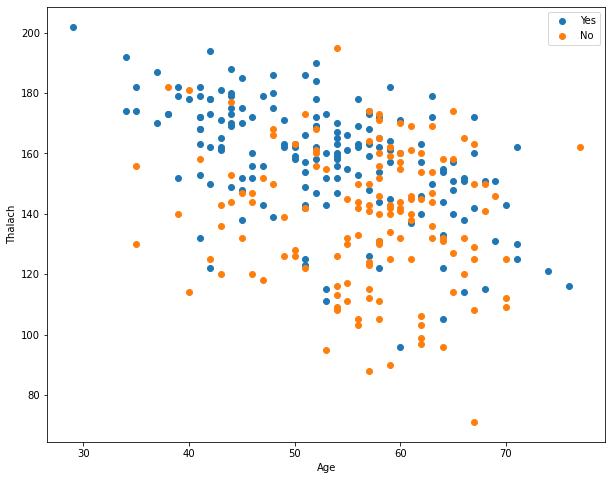

In [12]:
#
plt.figure(figsize=(10, 8))
plt.scatter(dataset.age[dataset.target==1], dataset.thalach[dataset.target==1])
plt.scatter(dataset.age[dataset.target==0], dataset.thalach[dataset.target==0])
#some changes to make it understandable
plt.xlabel("Age")
plt.legend(["Yes", "No"])
plt.ylabel("Thalach")
plt.show()

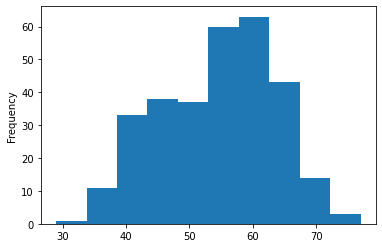

In [13]:
#showing the age distribution using histogram
dataset.age.plot.hist()
plt.show()

we can see that the most age we have is between 55 to 65 i guess

In [14]:
#Last step is creating a corr() map to know how variables affect each other in a positive way or negative way
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


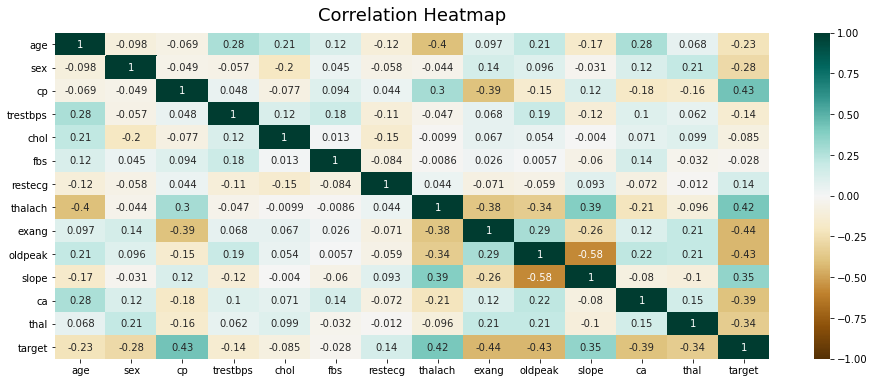

In [15]:
#maybe it's a little bit confusing so why not let it colorful and look more beautiful
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [16]:
# as a last step & b'coz i've notice in the correlation Heatmap there's a relation between chest pain & target, for that we'll create a crosstab and see:
pd.crosstab(dataset.cp, dataset.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


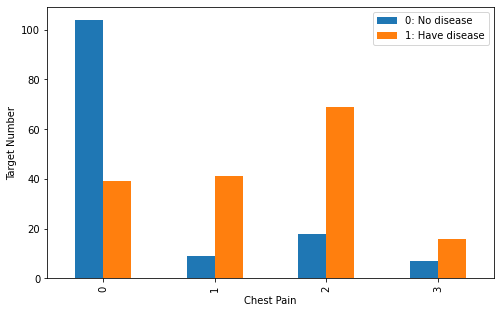

In [17]:
#let's convert our crosstab to a graph
pd.crosstab(dataset.cp, dataset.target).plot(kind='bar', figsize = (8, 5))

#make it clear
plt.legend(["0: No disease" , "1: Have disease"])
plt.xlabel("Chest Pain")
plt.ylabel("Target Number")
plt.show()

so we can see that type 2 of cp has more heart diseas than other, it's a little confusing here coz type 2 means chest pain that resembles heart pain (also called angina) in patients who do not have heart disease, **that's why in this case it's preferble to have or ask a doctor about this**

## Preparing Data For Machine Learning

Again, let's check if there's some null variable or not & display first & last lines before starting our work

In [18]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [20]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Modeling

our To do list gonna be like this in the few next steps:
1. splitting data into X and y
2. split into X_train, X_test & y_train, y_test
3. train dataset
4. test our model 

In [21]:
#splitting data into X and y
from sklearn.model_selection import train_test_split
X = dataset.drop(columns= "target", axis = 1)
y = dataset["target"]

#split into X_train, X_test & y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

training our dataset using 3 models, from sklearn map **<a href = "https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">Here</a>**, we can see that the classification has more than one algorithmes that's why, we'll use 3 models at the same time:
> * KNN Classifier <br>
> * Logistic Regression <br>
> * Random Forest Classifier

Here we can use 2 methode, the first by training and testing every model alone but in our case i'll use the 3 models, train and test them at the same time. How? <br>
simply by creating a dictionnary containning our model and a function to fit our data

In [22]:
#importing models from sklearn:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#creating dictionnary:
models = {"KNeighborsClassifier": KNeighborsClassifier(),
         "LogisticRegression": LogisticRegression(),
         "RandomForestClassifier": RandomForestClassifier()}

#creating function to fit and score our models:
def FitScore(models, X_train, X_test, y_train, y_test):
    #to get some result as me let's put random seed at 42
    np.random.seed(42)
    #creating empty dictionnary to keep our scores in:
    models_score = {}
    
    #fiting & scoring data using for loop:
    for name , model in models.items():
        #fit models:
        model.fit(X_train, y_train)
        #scoring and save it into models_score:
        models_score[name] = model.score(X_test, y_test)
    return models_score

In [23]:
model_scores = FitScore(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNeighborsClassifier': 0.5901639344262295,
 'LogisticRegression': 0.7868852459016393,
 'RandomForestClassifier': 0.7868852459016393}

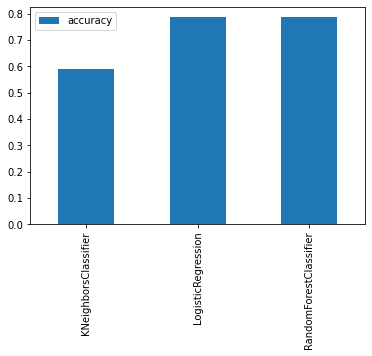

In [24]:
pd.DataFrame(model_scores, index=["accuracy"]).T.plot(kind="bar")
plt.show()

Emmm, should we stop here? <br>
Short answer No!, b'coz just getting the results not enough that's why let's dive in and make some Hyperparameter tuning to our models

## Hyperparameter Tuning

What is Hyperparameter tuning? <br>
Based on ggl it means: choosing a set of optimal hyperparameters for a learning algorithm

In [26]:
#Let's start with KNN
#you can check out Knn Parameters in sklearn and one of those parameters we can adjust the n_neighbors, yeah let's try to find it

#
from sklearn.metrics import accuracy_score

accuracyScore = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracyScore.append(accuracy_score(y_test, y_pred))

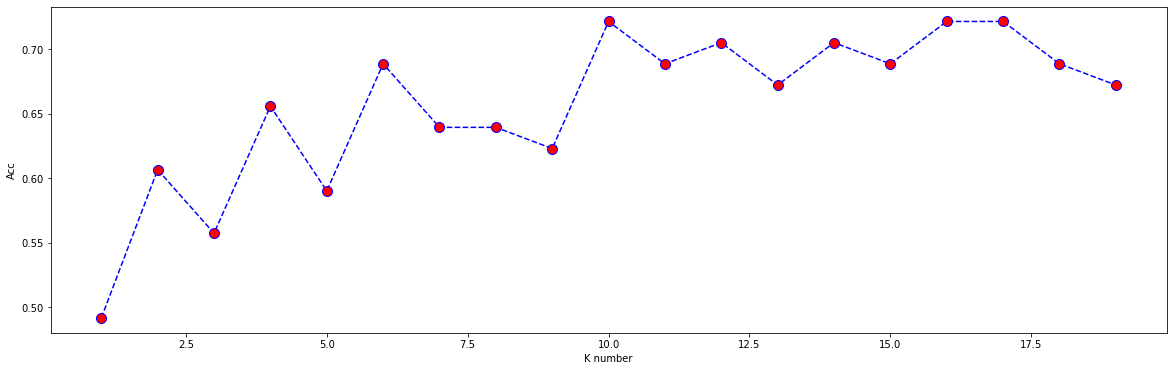

Min accuracy:- 0.7213114754098361 at K = 9


In [32]:
plt.figure(figsize=(20,6))
plt.plot(range(1,20),accuracyScore,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel("K number")
plt.ylabel("Acc")
plt.show()
print("Min accuracy:-",max(accuracyScore),"at K =",accuracyScore.index(max(accuracyScore)))

And yes we've got a new score it's 0.72 but at first was 0.59

In [55]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fit the model on our train set
g_res_knn = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [56]:
#get the best score
g_res.best_score_

0.6695473251028806

In [57]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [43]:
#Emmm, honestly i didn't like that score, but i'm gonna try other models

### Tune Logistic Regression

In [66]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_lr = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))

Best: 0.838495 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Tune Random Forest

In [53]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_rfc = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result_rfc.best_score_, grid_result_rfc.best_params_))

Best: 0.827419 using {'max_features': 'log2', 'n_estimators': 1000}


### Compare Between Our best Results Model

In [58]:
best_results = {'KNN': g_res.best_score_,
               'LR': grid_result_lr.best_score_,
               'RFC': grid_result_rfc.best_score_}
best_results

{'KNN': 0.6695473251028806,
 'LR': 0.8384946236559139,
 'RFC': 0.8274193548387095}

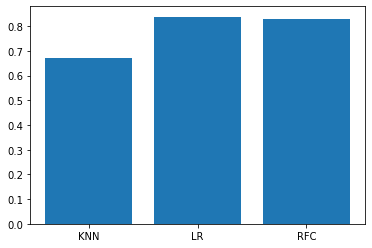

In [61]:
plt.bar(*zip(*best_results.items()))
plt.show()

We can see the best score LR which is Logistic Regression, maybe now it's time to evaluate it <br>
Yes i know we didn't get 95% in accuracy but that means maybe we need more data

### Evaluate Logistic Regression

In [70]:
#'max_features': 'log2', 'n_estimators': 1000
#let's create LR again but using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
lr = LogisticRegression( C = 0.1,  penalty = 'l2',  solver = 'lbfgs' )
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



In [73]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[20  9]
 [ 4 28]]


##### last thing to do using cross val to evaluate our LR model
* accuracy_score
* average_precision_score
* f1_score
* recall_score

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [76]:
from sklearn.model_selection import cross_val_score
#Accuracy
accuracy_score = cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "accuracy")
accuracy_score = np.mean(accuracy_score)
accuracy_score

C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8314754098360655

In [77]:
#precision
precision = cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "precision")
precision = np.mean(precision)
precision

C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8218744222254658

In [78]:
#f1
f1 = cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "f1")
f1 = np.mean(f1)
f1

C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8531737036477332

In [79]:
#recall
recall = cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "recall")
recall = np.mean(recall)
recall

C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.890909090909091

In [83]:
dict_scores = {'Accuracy': accuracy_score,
              'F1': f1,
              'Recall': recall,
              'Precision': precision}

In [84]:
dict_scores

{'Accuracy': 0.8314754098360655,
 'F1': 0.8531737036477332,
 'Recall': 0.890909090909091,
 'Precision': 0.8218744222254658}

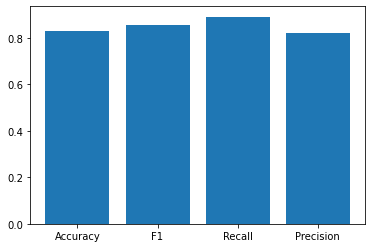

In [85]:
plt.bar(*zip(*dict_scores.items()))
plt.show()

## Finding Feature importance

In [86]:
#findout best parametres LR
grid_result_lr.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [93]:
clf = LogisticRegression(C =  0.1, penalty = 'l2', solver = 'lbfgs')
clf.fit(X_train, y_train);

C:\Users\21265\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
#check Coef
clf.coef_

array([[ 0.02771486, -0.65448584,  0.54257917, -0.02013766, -0.00389719,
        -0.10715692,  0.18213316,  0.02836385, -0.4131516 , -0.47276226,
         0.18173328, -0.64324722, -0.57368603]])

In [95]:
#Match coef's of features to columns
feat_dict = dict(zip(dataset.columns, list(clf.coef_[0])))
feat_dict

{'age': 0.027714862198659075,
 'sex': -0.6544858368550073,
 'cp': 0.542579167216274,
 'trestbps': -0.02013765857701825,
 'chol': -0.0038971882444026463,
 'fbs': -0.10715692315314736,
 'restecg': 0.18213315994966703,
 'thalach': 0.028363851567145836,
 'exang': -0.41315160468674994,
 'oldpeak': -0.4727622605891905,
 'slope': 0.18173327532741676,
 'ca': -0.6432472194520201,
 'thal': -0.5736860320395457}

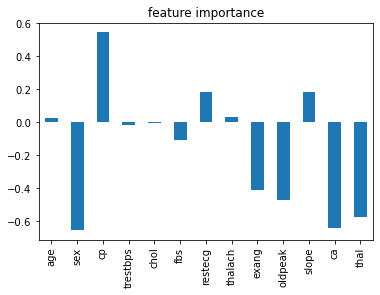

In [96]:
#Visualize feat importance
pd.DataFrame(feat_dict, index = [0]).T.plot.bar(title = "feature importance", legend= False);


as a conclusion, the feature importance visualization it's similar to the Correlation Heatmap

## Experimentation

So, here we are at the final stage.

we know that we didn't hit our goal 95% accuracy. and ther's various choice to do know: <br>
        * getting and collect more data <br>
        * trying other models <br>
        * tunning more and more ou curent model

###### Now, we're going to export our model and try convert it into an app and share it in the internet but not in this notebook, see you again